In [738]:
import pandas as pd
import numpy as np

In [739]:
pd.options.display.float_format = "{:,.2f}".format

In [740]:
df = pd.read_csv('customer_segmentation.csv')

In [741]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Details of Features

Id: Unique identifier for each individual in the dataset.<br>
Year_Birth: The birth year of the individual.<br>
Education: The highest level of education attained by the individual.<br>
Marital_Status: The marital status of the individual.<br>
Income: The annual income of the individual.<br>
Kidhome: The number of young children in the household.<br>
Teenhome: The number of teenagers in the household.<br>
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.<br>
Recency: The number of days since the last purchase or interaction.<br>
MntWines: The amount spent on wines.<br>
MntFruits: The amount spent on fruits.<br>
MntMeatProducts: The amount spent on meat products.<br>
MntFishProducts: The amount spent on fish products.<br>
MntSweetProducts: The amount spent on sweet products.<br>
MntGoldProds: The amount spent on gold products.<br>
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.<br>
NumWebPurchases: The number of purchases made through the company's website.<br>
NumCatalogPurchases: The number of purchases made through catalogs.<br>
NumStorePurchases: The number of purchases made in physical stores.<br>
NumWebVisitsMonth: The number of visits to the company's website in a month.<br>
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.<br>
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.<br>
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.<br>
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.<br>
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.<br>
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.<br>
Z_CostContact: A constant cost associated with contacting a customer.<br>
Z_Revenue: A constant revenue associated with a successful campaign response.<br>
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.<br>

In [742]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Missing Values

In [743]:
df[df.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [744]:
df.shape

(2240, 29)

In [745]:
df.shape[0] - df[df.isnull().any(axis=1)].shape[0]

2216

The missing columns seemingly appear on only the Income column.  And for this reason the missing columns might mean that they could not find the income for these customers.  This hereby justifies my decision of dropping the null values.

In [746]:
df = df.dropna()

In [747]:
df[df.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [748]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [749]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [750]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [751]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'customer count')

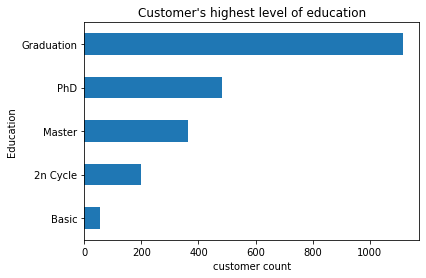

In [752]:
df['Education'].value_counts().sort_values().plot(kind='barh', title="Customer's highest level of education")
plt.xlabel('customer count')

Text(0.5, 0, 'customer count')

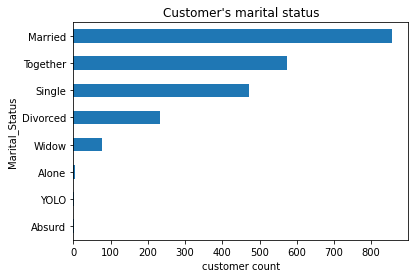

In [753]:
df['Marital_Status'].value_counts().sort_values().plot(kind='barh', title="Customer's marital status")
plt.xlabel('customer count')

Most customer's of this firm are either Married or have a partner

In [754]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Text(0, 0.5, 'frequency')

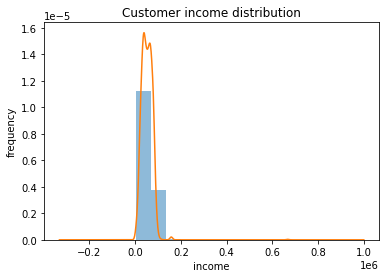

In [755]:
ax = df['Income'].plot(kind='hist', density=True, alpha=0.5, title='Customer income distribution')
ax = df['Income'].plot(kind='kde')
plt.xlabel('income')
plt.ylabel('frequency')

<Axes: ylabel='Kidhome'>

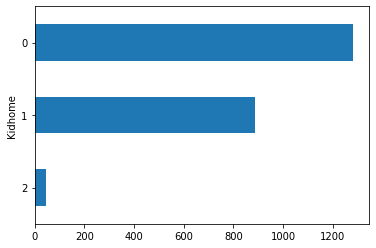

In [756]:
df['Kidhome'].value_counts().sort_values().plot(kind='barh')

In [757]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [758]:
df = df.assign(
    Totalchildren=lambda x: x['Kidhome'] + x['Teenhome']
)

In [759]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Totalchildren
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,"64,014.00",2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,"69,245.00",0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,1


<Axes: xlabel='Totalchildren'>

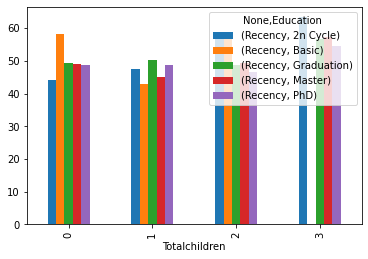

In [760]:
df.groupby(['Totalchildren', 'Education'])[['Recency']].mean().unstack().plot(kind='bar')

In [761]:
df = df.assign(
    Dt_Customer=pd.to_datetime(df['Dt_Customer'], dayfirst=True)
)


In [762]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Totalchildren
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


In [763]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Totalchildren'],
      dtype='object')

array([[<Axes: title={'center': 'MntWines'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>,
        <Axes: title={'center': 'MntFruits'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>],
       [<Axes: title={'center': 'MntMeatProducts'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>,
        <Axes: title={'center': 'MntFishProducts'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>],
       [<Axes: title={'center': 'MntSweetProducts'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>,
        <Axes: title={'center': 'MntGoldProds'}, xlabel='Totalchildren', ylabel='AMOUNT ($)'>]],
      dtype=object)

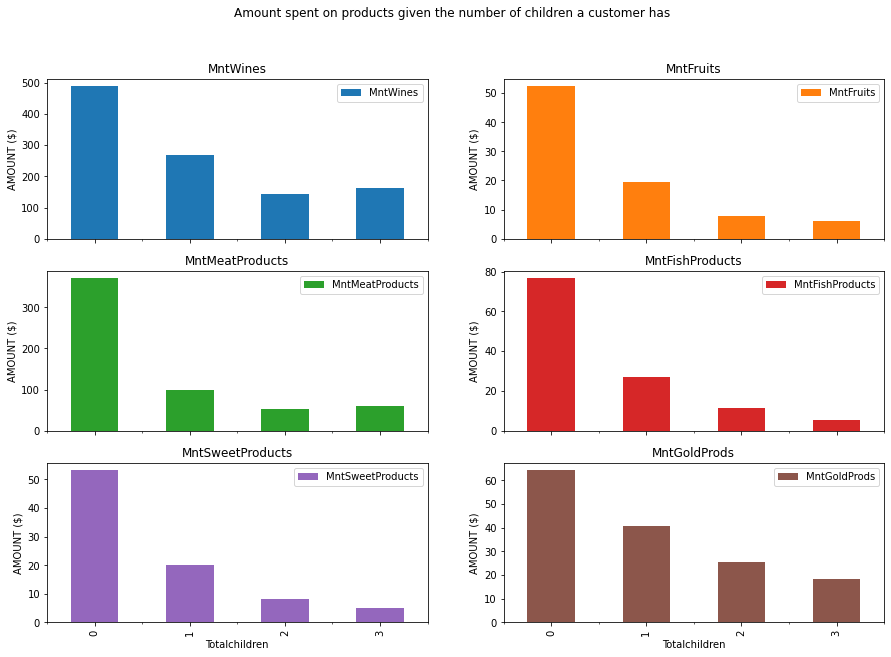

In [764]:
df.groupby('Totalchildren')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', subplots=True, figsize=(15,10),layout=(3,2), title='Amount spent on products given the number of children a customer has', ylabel='AMOUNT ($)')


From the analysis we can see that customers with no children are spending the most amount of money on all products

Text(0, 0.5, 'Amount ($)')

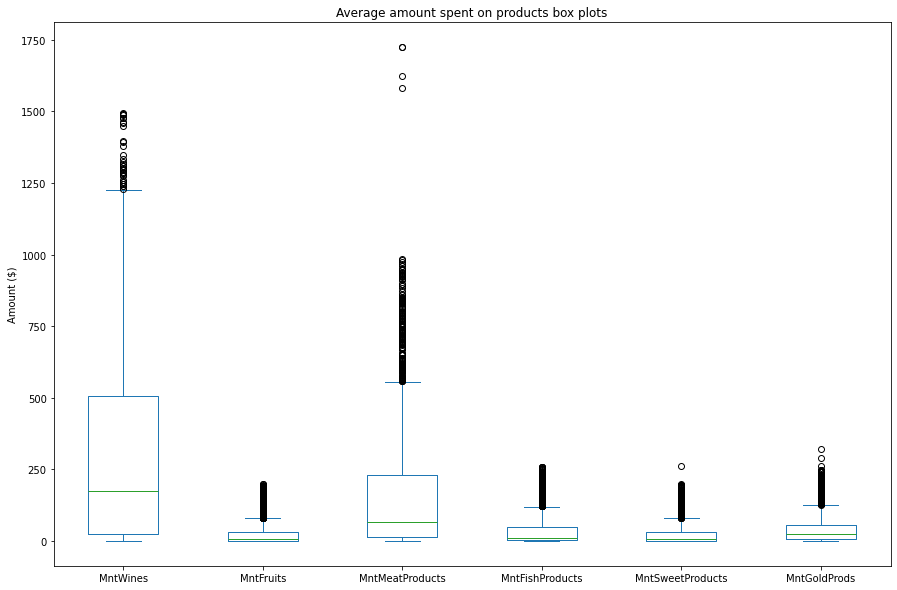

In [765]:
df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].plot(kind='box', subplots=False, layout=(3,2), figsize=(15,10), title='Average amount spent on products box plots')
plt.ylabel('Amount ($)')

From the boxplot we can see that the most products people buy are wines, followed by Meat

In [766]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Totalchildren'],
      dtype='object')

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

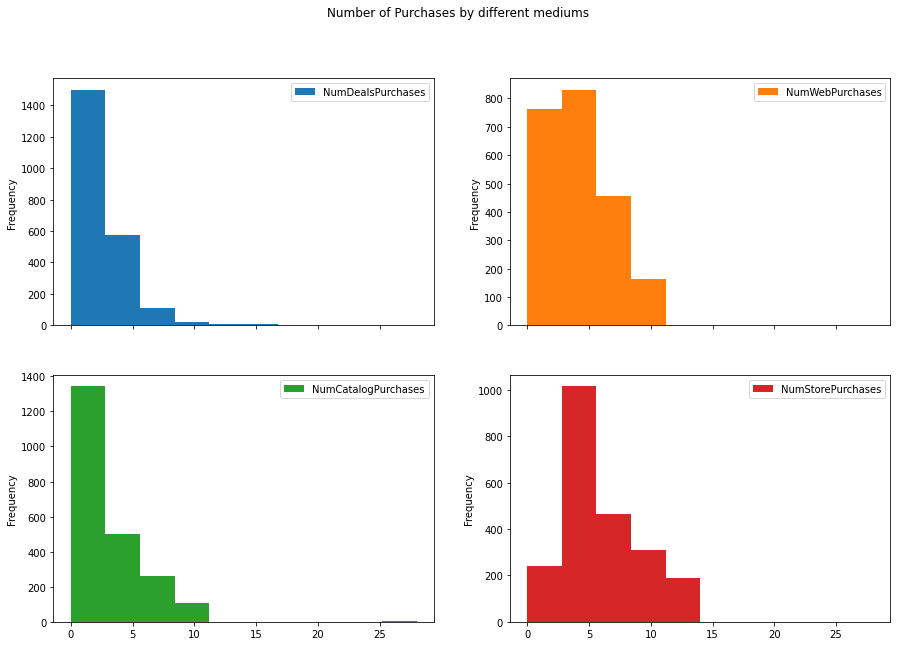

In [767]:
df[
    ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
].plot(kind="hist", subplots=True, layout=(2, 2), figsize=(15, 10), title='Number of Purchases by different mediums')

Most purchases are coming from NumDealsPurchases and NumCatalogPurchases<br>
NumDealsPurchases refer to purchases made with a discount or as part of a deal <br>
NumCatalogPurchases refer to the number of purchases made through catalogs <br>
Most customers buy 3 or more products when they shop from the store<br>

In [768]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Totalchildren'],
      dtype='object')

In [769]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4']].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4
count,"2,216.00","2,216.00","2,216.00","2,216.00"
mean,0.06,0.01,0.07,0.07
std,0.24,0.12,0.26,0.26
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00


In [770]:
df[['AcceptedCmp1']].value_counts()

AcceptedCmp1
0               2074
1                142
Name: count, dtype: int64

In [771]:
df[['Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]

,Complain,Z_CostContact,Z_Revenue,Response
0,0,3,11,1
1,0,3,11,0
2,0,3,11,0
3,0,3,11,0
4,0,3,11,0
...,...,...,...,...
2235,0,3,11,0
2236,0,3,11,0
2237,0,3,11,0
2238,0,3,11,0


The other columnns 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response' are of no use to us right now.

# KMeans Clustering on Customers

In [772]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Totalchildren
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,1


We want to segment these customers based on their income, total_children and the total_amount_spent<br>
The total_amount_spent refer to the total amount that a particular customer spent on all the products from the time they started shopping<br>
We will create that column now

In [773]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Totalchildren'],
      dtype='object')

In [774]:
df = df.assign(
    Total_Amount_Spent=df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

In [775]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Totalchildren,Total_Amount_Spent
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,1,1341
2236,4001,1946,PhD,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,3,444
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,0,1241
2238,8235,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,1,843


In [776]:
df = df[['Income', 'Totalchildren', 'Total_Amount_Spent']]

In [777]:
df

,Income,Totalchildren,Total_Amount_Spent
0,"58,138.00",0,1617
1,"46,344.00",2,27
2,"71,613.00",0,776
3,"26,646.00",1,53
4,"58,293.00",1,422
...,...,...,...
2235,"61,223.00",1,1341
2236,"64,014.00",3,444
2237,"56,981.00",0,1241
2238,"69,245.00",1,843


In [778]:
from sklearn.preprocessing import StandardScaler

In [779]:
scaler = StandardScaler()

In [780]:
new_df = df.assign(
    Income=scaler.fit_transform(df[['Income']]),
    Totalchildren=scaler.fit_transform(df[['Totalchildren']]),
    Total_Amount_Spent=scaler.fit_transform(df[['Total_Amount_Spent']]),

)

In [781]:
new_df

,Income,Totalchildren,Total_Amount_Spent
0,0.23,-1.26,1.68
1,-0.23,1.41,-0.96
2,0.77,-1.26,0.28
3,-1.02,0.07,-0.92
4,0.24,0.07,-0.31
...,...,...,...
2235,0.36,0.07,1.22
2236,0.47,2.74,-0.27
2237,0.19,-1.26,1.05
2238,0.68,0.07,0.39


<Axes: title={'center': 'Relationship between Income and Total Amount Spent'}, xlabel='Income', ylabel='Total_Amount_Spent'>

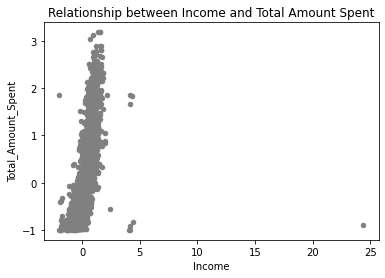

In [782]:
new_df.plot.scatter(x='Income',y='Total_Amount_Spent', color='gray', title='Relationship between Income and Total Amount Spent')

There is a positive correlation between the income and the total amount spent<br>
As the customer earns more money, they start spending more in the store.

In [783]:
from sklearn.cluster import KMeans

KMeans clustering is an algorithm that tries to find a way of grouping data points into k different groups<br>
We will use this algorithm to group our customers into distinct groups

In [784]:
model = KMeans(n_clusters=3, random_state=42)

In [785]:
model.fit(new_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [786]:
new_df['Cluster'] = model.predict(new_df)

In [787]:
new_df['Cluster'].value_counts()

Cluster
0    964
1    795
2    457
Name: count, dtype: int64

<Axes: xlabel='Cluster'>

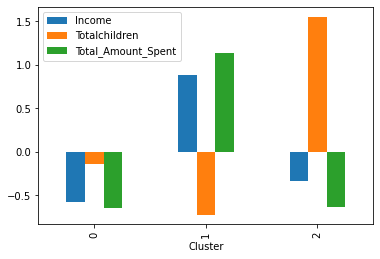

In [788]:
new_df.groupby('Cluster').mean().plot(kind='bar')

Group 0 - low income, moderate total children and low spenders <br>
Group 1- high income, low no of children and high spenders <br>
Group 2 - moderate income, high no of children and low spenders <br>

From the clusters above we can see that the customers who spent the most on the store products are earning more and have less children.<br>


## Chossing clusters using Elbow method

In [792]:
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(new_df).inertia_
    inertia_scores.append(inertia)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [793]:
inertia_scores

[4653.076894923,
 2521.085519347237,
 2088.9488032292816,
 1534.876803268241,
 1250.3471429760698,
 1052.6256007868626,
 875.1209980760887,
 752.6659645523034,
 679.5809259380069]

In [794]:
inertia_df = pd.DataFrame({'No of Clusters': range(2,11),
                           'Inertia score': inertia_scores})

In [795]:
inertia_df

,No of Clusters,Inertia score
0,2,"4,653.08"
1,3,"2,521.09"
2,4,"2,088.95"
3,5,"1,534.88"
4,6,"1,250.35"
5,7,"1,052.63"
6,8,875.12
7,9,752.67
8,10,679.58


<Axes: xlabel='No of Clusters'>

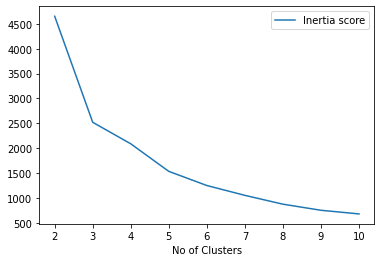

In [796]:
inertia_df.set_index('No of Clusters').plot(kind='line', y='Inertia score')

The optimal number of clusters is 3 so we chose the right amount of clusters